<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# Telecom chrun and Region based Division of US state dataframe

df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    3333 non-null   object 
 1   Account length           3333 non-null   int64  
 2   Area code                3333 non-null   int64  
 3   International plan       3333 non-null   object 
 4   Voice mail plan          3333 non-null   object 
 5   Number vmail messages    3333 non-null   int64  
 6   Total day minutes        3333 non-null   float64
 7   Total day calls          3333 non-null   int64  
 8   Total day charge         3333 non-null   float64
 9   Total eve minutes        3333 non-null   float64
 10  Total eve calls          3333 non-null   int64  
 11  Total eve charge         3333 non-null   float64
 12  Total night minutes      3333 non-null   float64
 13  Total night calls        3333 non-null   int64  
 14  Total night charge      

In [328]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl calls,Total intl charge,Customer service calls,Total revenue,number of calls,day charge per minute,eve charge per minute,night charge per minute,intl charge per minute,complaint percent
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,4.479448,2.764581,1.562856,59.449754,306.69997,0.169901,0.084976,0.045000,0.268598,0.515074
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,2.461214,0.753773,1.315491,10.502261,34.44939,0.004164,0.001472,0.000017,0.019798,0.438864
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,22.930000,194.00000,0.000000,0.000000,0.044828,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,3.000000,2.300000,1.000000,52.380000,284.00000,0.169989,0.084988,0.044988,0.269811,0.290000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,4.000000,2.780000,1.000000,59.470000,307.00000,0.170004,0.085000,0.045000,0.270000,0.360000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,6.000000,3.270000,2.000000,66.480000,330.00000,0.170017,0.085013,0.045013,0.270297,0.720000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,20.000000,5.400000,9.000000,96.150000,418.00000,0.170513,0.085075,0.045111,0.272727,2.940000


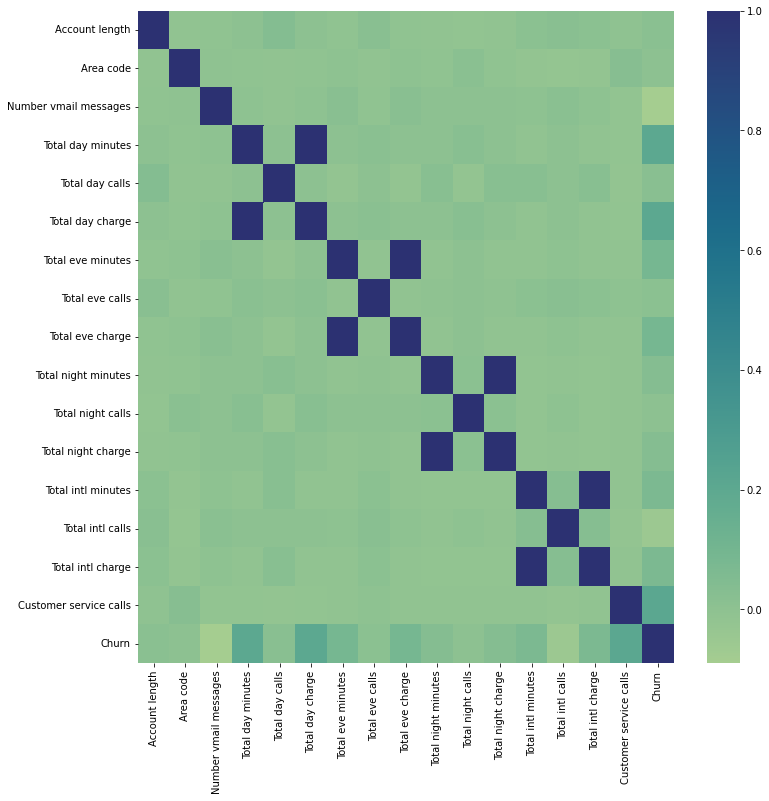

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [231]:
# Relation between column label

heat_data=df
heatmap_corr=heat_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(heatmap_corr,cmap="crest")
plt.show()
plt.savefig(f"Heatmap.png")
files.download(f"Heatmap.png") 


In [232]:
#Total Revenue earned by company from each customer 

df['Total revenue']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [233]:
#Number of calls by Customer in total

df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [234]:
#Sorting values by State in Dataframes

df.sort_values(by='State',inplace=True,ignore_index=True)

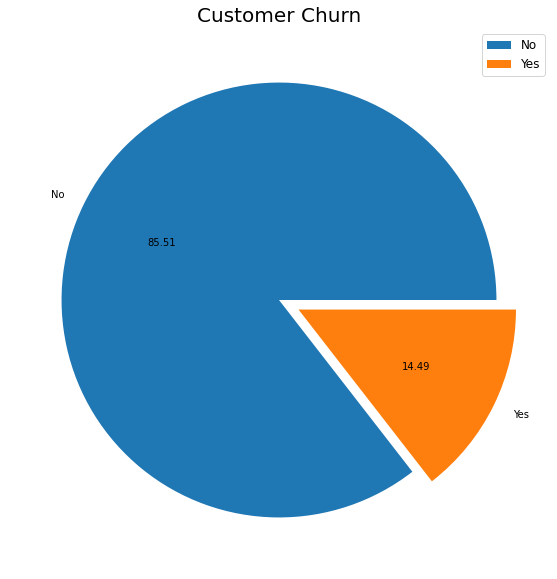

In [333]:
# Customer Churn
x=df['Churn'].value_counts()
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(x,labels=['No','Yes'],explode=(0,0.1),autopct='%0.2f')
ax.set_title('Customer Churn',fontsize=20)
ax.legend(fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

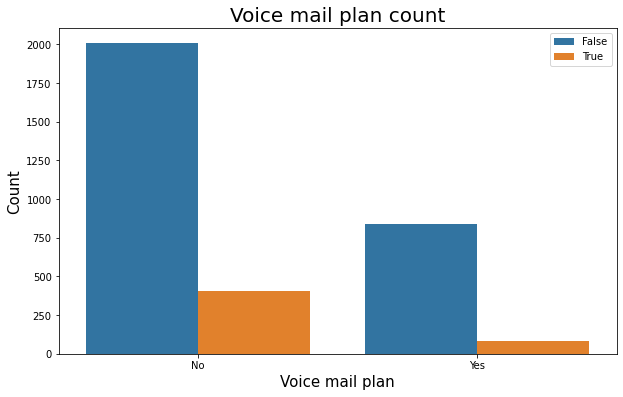

In [331]:
#Percent of customer having voice mail plan

x=df['Voice mail plan'].value_counts()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.countplot(df['Voice mail plan'],hue=df['Churn'])
ax.set_title('Voice mail plan count',fontsize=20)
ax.set_xlabel('Voice mail plan',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend()
plt.savefig("Voice mail plan.png")
files.download("Voice mail plan.png") 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

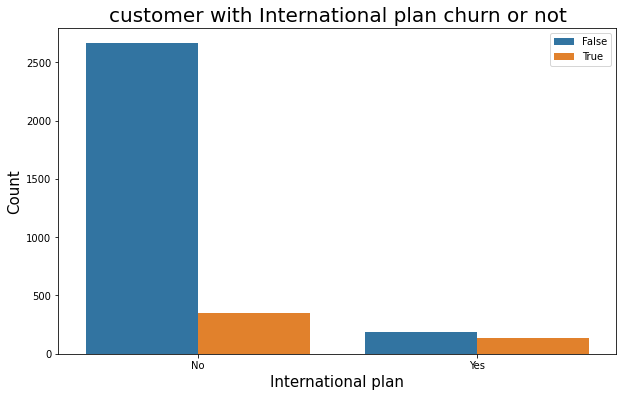

In [335]:
# Whether the customer with International plan churn or not
x=df['International plan'].value_counts()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.countplot(df['International plan'],hue=df['Churn'])
ax.set_title('customer with International plan churn or not',fontsize=20)
ax.set_xlabel('International plan',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend()
plt.savefig("International plan.png")
files.download("International plan.png") 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


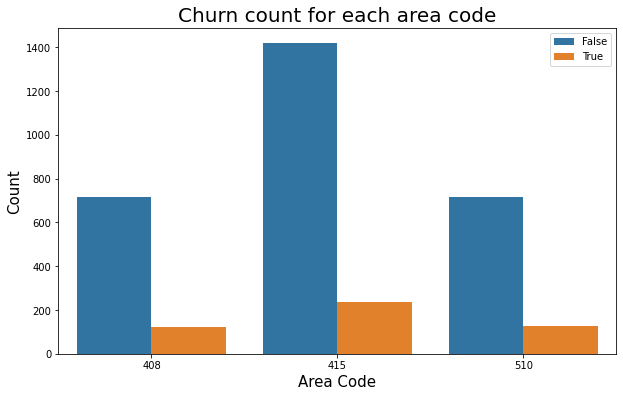

In [337]:
# Churn count for each Area code 
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.countplot(df['Area code'],hue=df['Churn'])
ax.set_title('Churn count for each area code',fontsize=20)
ax.set_xlabel('Area Code',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.legend()

In [341]:
#Number of Customer in each State

number_of_customer_each_state=df[['State']].value_counts().reset_index()
number_of_customer_each_state.rename(columns={0: "Number of customer"},inplace=True)

In [342]:
#Sort the dataframe of number of customer

number_of_customer_each_state.sort_values(by='Number of customer',inplace=True)
number_of_customer_each_state.reset_index(inplace=True)

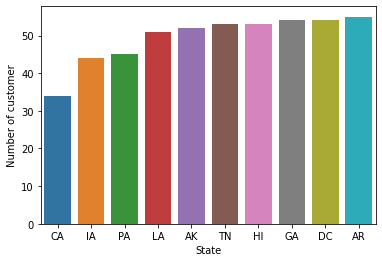

In [346]:
# Top 10 State with lowest number of customer 
sns.barplot(x='State',y='Number of customer',data=number_of_customer_each_state.head(10))

In [241]:
#List of State

state_list=list(df['State'].sort_values().unique())
print(state_list)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [242]:
#Dataframe of deactivated account id

data_for_stop_id=df[df['Churn']==True][['State','Account length','Area code','Customer service calls','Churn']].groupby(by='State')


In [243]:
#list of number of stop using service statewise

list_Account_id_stop=[]

for i in state_list:
  a=list(data_for_stop_id.get_group(i)['Account length'])
  list_Account_id_stop.append(a)
dictionary_state_stop_id=dict(zip(state_list,list_Account_id_stop))
print(dictionary_state_stop_id)

{'AK': [126, 111, 177], 'AL': [197, 55, 93, 86, 60, 89, 172, 25], 'AR': [118, 115, 127, 54, 76, 107, 145, 99, 109, 98, 113], 'AZ': [66, 113, 109, 12], 'CA': [84, 112, 151, 103, 111, 37, 138, 79, 105], 'CO': [130, 159, 121, 105, 154, 121, 92, 132, 77], 'CT': [120, 119, 77, 125, 56, 93, 23, 87, 115, 160, 64, 96], 'DC': [114, 82, 60, 24, 66], 'DE': [113, 129, 224, 2, 122, 67, 138, 97, 51], 'FL': [55, 166, 127, 144, 100, 105, 132, 70], 'GA': [76, 93, 132, 44, 89, 117, 128, 122], 'HI': [105, 99, 108], 'IA': [81, 40, 44], 'ID': [130, 78, 103, 82, 77, 193, 119, 116, 92], 'IL': [89, 68, 78, 71, 137], 'IN': [117, 65, 94, 115, 122, 129, 68, 113, 72], 'KS': [167, 110, 24, 126, 46, 91, 47, 170, 84, 92, 105, 110, 94], 'KY': [98, 21, 39, 113, 58, 74, 91, 75], 'LA': [150, 124, 109, 155], 'MA': [40, 111, 127, 98, 119, 17, 71, 88, 62, 34, 136], 'MD': [135, 76, 61, 111, 93, 108, 136, 133, 119, 172, 154, 62, 93, 116, 88, 107, 147], 'ME': [62, 100, 75, 23, 92, 88, 80, 36, 97, 102, 118, 56, 131], 'MI': [22

In [244]:
#Extraction of number chrun customer statewise list:

number_of_churn_statewise=[]
for i in list(df['State'].unique()):
  n=len(dictionary_state_stop_id.get(i))
  number_of_churn_statewise.append(n)
print(number_of_churn_statewise)

[3, 8, 11, 4, 9, 9, 12, 5, 9, 8, 8, 3, 3, 9, 5, 9, 13, 8, 4, 11, 17, 13, 16, 15, 7, 14, 14, 11, 6, 5, 9, 18, 6, 14, 15, 10, 9, 11, 8, 6, 14, 8, 5, 18, 10, 5, 8, 14, 7, 10, 9]


In [245]:
#Creating a dictionary for pandas dataframe of churn customer statewise

dataframe_churn = {"State":state_list, "Number of Churn": number_of_churn_statewise}

In [246]:
#churn customer dataframe

churn_data_statewise=pd.DataFrame(dataframe_churn)

In [247]:
#dataframe of number of customer and churn customer in a State

comparision_data_for_chrun=number_of_customer_each_state.set_index('State').join(churn_data_statewise.set_index('State'))

In [ ]:
#index reseting

comparision_data_for_chrun.reset_index(level=0,inplace=True)
comparision_data_for_chrun.head()

In [249]:
# Joining comparision dataframe with df2 to get Region in the dataframe

comparision_data_for_chrun=comparision_data_for_chrun.sort_values(by='Number of Churn')

In [250]:
# Percentage retention of the Customer in each State

comparision_data_for_chrun['retention percent']=comparision_data_for_chrun.apply(lambda x:(1-x['Number of Churn']/x['Number of customer'])*100,axis=1)
comparision_data_for_chrun.sort_values(by='retention percent',inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

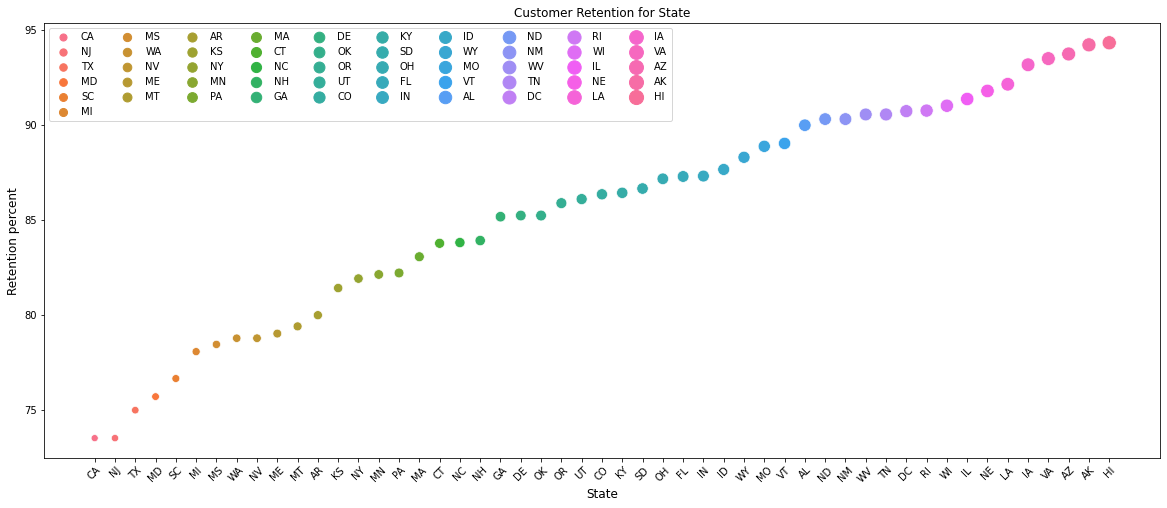

In [251]:
#Customer Retention Plot for each State

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='retention percent',data=comparision_data_for_chrun,hue='State',size='State',sizes=(200,50))
plt.xticks(rotation=45)
plt.xlabel(f"State",size=12)
plt.ylabel("Retention percent",size=12)
plt.legend(ncol=10)
plt.title(f'Customer Retention for State')
plt.savefig("Customer Retention for State.png")
files.download("Customer Retention for State.png") 

In [252]:
def charge_per_minute(arg1,arg2):
  '''Function to calculate the Charge per minute, where arg1 reperesent Charge and arg2 represent time '''
  if arg1==0 and arg2==0:
    minute_charge=int(0)
    return minute_charge
  else:
    minute_charge=arg1/arg2
    return minute_charge


In [253]:
#Average Price per minutes for day,eve,night,international calls

df['day charge per minute']=df.apply(lambda x: charge_per_minute(x['Total day charge'],x['Total day minutes']),axis=1)

df['eve charge per minute']=df.apply(lambda x: charge_per_minute(x['Total eve charge'],x['Total eve minutes']),axis=1)

df['night charge per minute']=df.apply(lambda x: charge_per_minute(x['Total night charge'],x['Total night minutes']),axis=1)

df['intl charge per minute']=df.apply(lambda x: charge_per_minute(x['Total intl charge'],x['Total intl minutes']),axis=1)

In [286]:
#Data Extracted for the calculation of average of Account length,State,Number vmail messages,day charge per minute,eve charge per minute,night charge per minute,intl charge per minute, call minutes, Total revenue, number of calls

data_for_mean=df[['Account length','State','Number vmail messages','day charge per minute',
                  'eve charge per minute','night charge per minute','intl charge per minute',
                  'Total revenue', 'number of calls']]

In [287]:
#Average formula application on the Extracted data

data_mean=data_for_mean.groupby(by=["State"]).agg('mean')[['Account length','day charge per minute',
                                                           'eve charge per minute','night charge per minute',
                                                           'intl charge per minute',
                                                           'Total revenue','number of calls']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

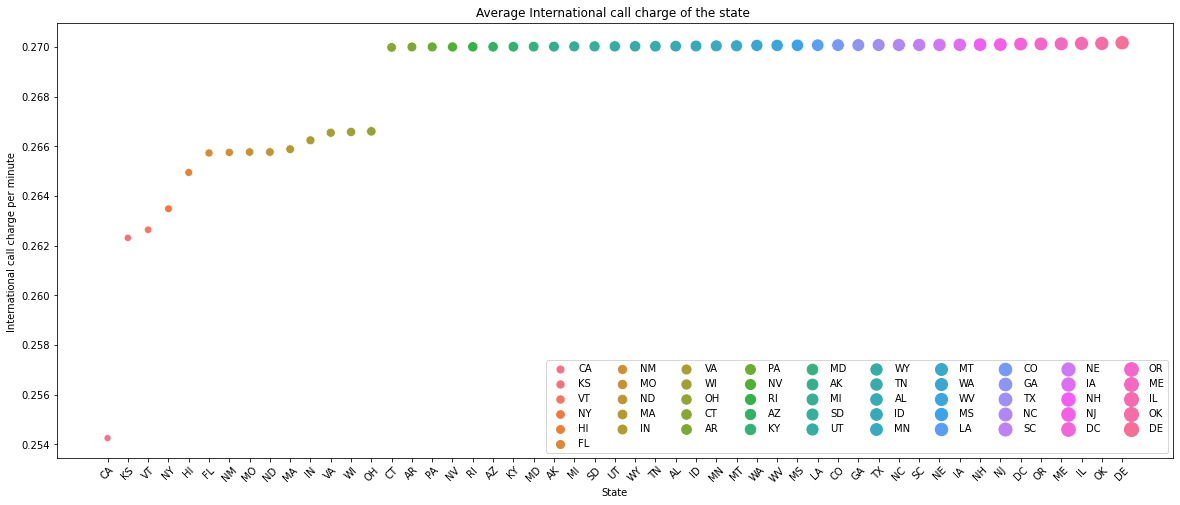

In [257]:
#Plot of Average International call charge of the state 

data_mean.sort_values(by='intl charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='intl charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f'Average International call charge of the state ')
plt.ylabel("International call charge per minute ")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)
plt.savefig(f"Average International call charge of the state.png")
files.download(f"Average International call charge of the state.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

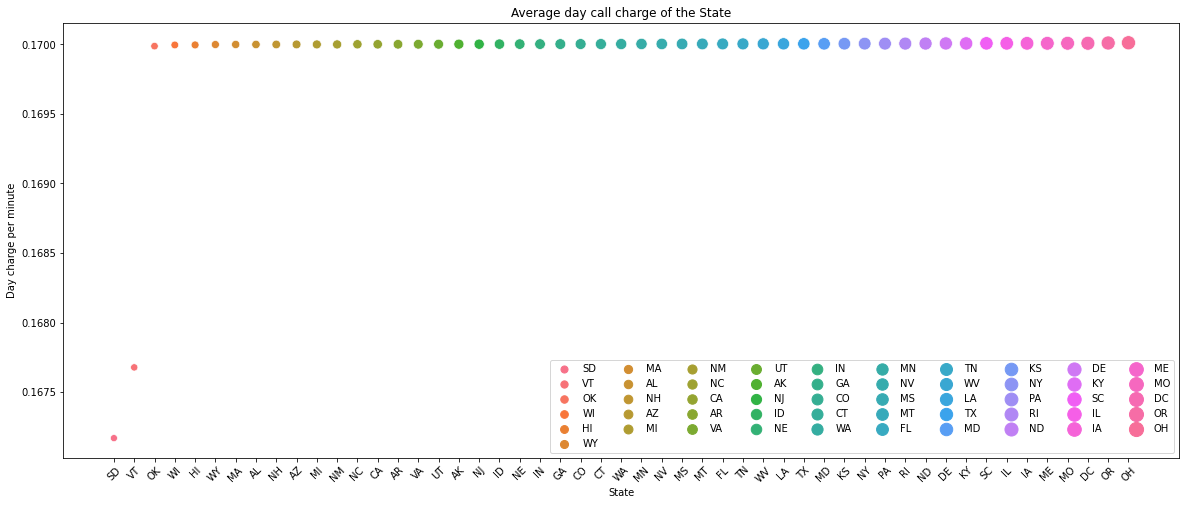

In [259]:
# Plot average day charge per minute for the state 

data_mean.sort_values(by='day charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='day charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f'Average day call charge of the State')
plt.ylabel("Day charge per minute")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)
plt.savefig(f"Average day call charge of the state.png")
files.download(f"Average day call charge of the state.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

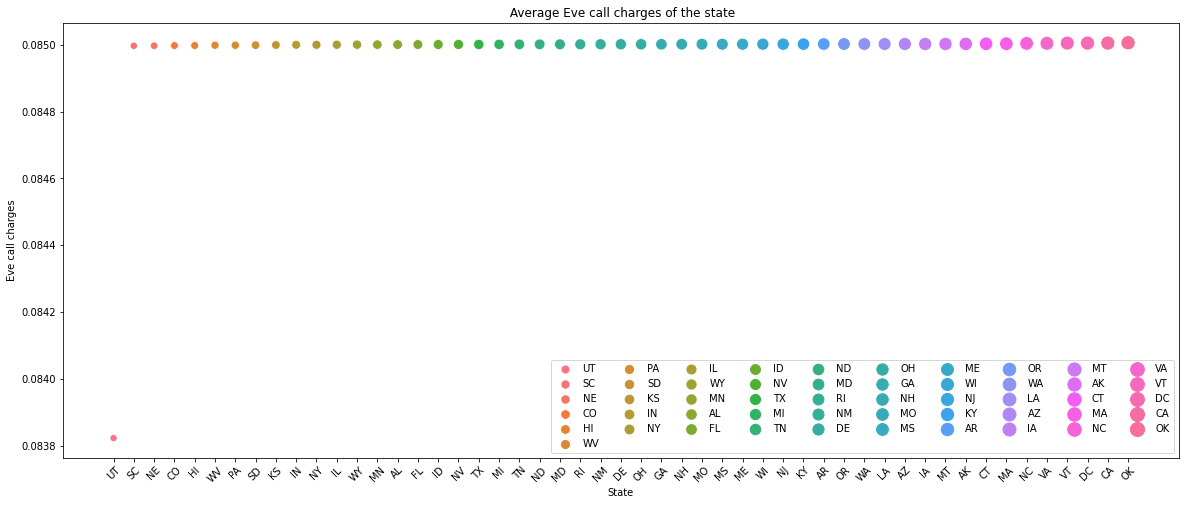

In [260]:
# Plot average Eve charge per minute for the state 

data_mean.sort_values(by='eve charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='eve charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Average Eve call charges of the state')
plt.ylabel("Eve call charges")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)
plt.savefig(f"Average Eve charge of the state.png")
files.download(f"Average Eve charge of the state.png") 

In [322]:
# Total Revenue Earn by the each state 
revenue=df.groupby(by='State')[['Total revenue']].agg('sum')
revenue.sort_values(by='Total revenue',inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 lowest revenue earning state')

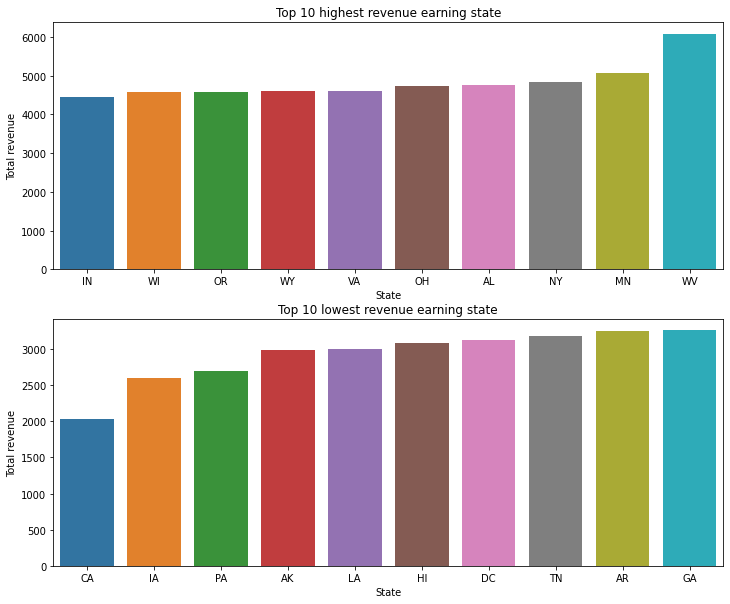

In [321]:
rev_1=revenue.tail(10)
rev_2=revenue.head(10)
fig,ax=plt.subplots(2,1,figsize=(12,10))
sns.barplot(rev_1.index,rev_1['Total revenue'],ax=ax[0])
ax[0].set_title("Top 10 highest revenue earning state")
sns.barplot(rev_2.index,rev_2['Total revenue'],ax=ax[1])
ax[1].set_title("Top 10 lowest revenue earning state")

In [262]:
# Complaint percent for the Services

df['complaint percent']=df.apply(lambda x: round((x['Customer service calls']/x['number of calls']*100),2),axis=1)

In [ ]:
# data extraction when the customer has churn the service and sort the data by States

da=df[df['Churn']==True][['State','Churn','Customer service calls','number of calls','complaint percent','Total revenue','Total intl charge','Total night charge','Total day charge','Total eve charge']]
da.sort_values(by=['State'])

In [264]:
# Total number of customer churn 
total_churn=df[df['Churn']==True]['Churn'].count()

In [265]:
# Condition When Certain Condition in the Dataframe 

cond1=(da['complaint percent']>0.5)
cond2=(da['Total intl charge']>df['Total intl charge'].agg('mean'))
cond4=(da['number of calls']<df['number of calls'].agg('mean'))
cond5=(da['Total day charge']>df['Total day charge'].agg('mean'))
cond6=(da['Total eve charge']>df['Total eve charge'].agg('mean'))
cond7=(da['Total night charge']>df['Total night charge'].agg('mean'))

In [266]:
#Count of the Churn when Condition 1 is meet:

num1=da[cond1]['Churn'].count()
churn_percent=round((num1/total_churn)*100,2)
print(f'{churn_percent}% customer churn if customer service call is more than 0.5% of total call')

55.49% customer churn if customer service call is more than 0.5% of total call


In [267]:
#Count of the Churn when Condition 2 is meet:

num2=da[cond2]['Churn'].count()
churn_percent=round((num2/total_churn)*100,2)
print(f'{churn_percent}% customer churn when international charge are more than average international charge')

55.69% customer churn when international charge are more than average international charge


In [268]:
#Count of the Churn when Condition 4 is meet:

num4=da[cond4]['Churn'].count()
churn_percent=round((num4/total_churn)*100,2)
print(f'{churn_percent}% customer churn when number of call is less than average calls')

48.24% customer churn when number of call is less than average calls


In [269]:
#Count of the Churn when Condition 5 is meet:

num5=da[cond5]['Churn'].count()
churn_percent=round((num5/total_churn)*100,2)
print(f'{churn_percent}% customer churn when total day charge is more than average day charges')

60.25% customer churn when total day charge is more than average day charges


In [270]:
#Count of the Churn when Condition 6 is meet:

num6=da[cond6]['Churn'].count()
churn_percent=round((num6/total_churn)*100,2)
print(f'{churn_percent}% customer churn when total eve charge is more than average eve charges')

59.42% customer churn when total eve charge is more than average eve charges


In [271]:
#Count of the Churn when Condition 7 is meet:

num7=da[cond7]['Churn'].count()
churn_percent=round((num7/total_churn)*100,2)
print(f'{churn_percent}% customer churn when total night charge is more than average night charges')

53.83% customer churn when total night charge is more than average night charges
